**Investigating LEGO across a half-century!**

The Maven Analytics Data Playground hosts a dataset focused on LEGO, covering the period from 1970 to 2022. It includes details on various themes, piece counts per theme, age recommendations, retail prices, and images associated with each theme.

## *Exploratory Data Analysis*

Before we proceed with analysis, we must process and clean the data. In this section we handle missing values, incorrect or invalid data, we will also remove irrelevant data (if any)

In [2]:
#First let's import Pandas and Numpy libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline



In [3]:
# Loading data using pandas
lego_df = pd.read_csv('lego_sets.csv')

In [4]:
# Get a view of dataset
lego_df.head(10)

,set_id,name,year,theme,subtheme,themeGroup,category,pieces,minifigs,agerange_min,US_retailPrice,bricksetURL,thumbnailURL,imageURL
0,1-8,Small house set,1970,Minitalia,NaN,Vintage,Normal,67.0,NaN,NaN,NaN,https://brickset.com/sets/1-8,https://images.brickset.com/sets/small/1-8.jpg,https://images.brickset.com/sets/images/1-8.jpg
1,2-8,Medium house set,1970,Minitalia,NaN,Vintage,Normal,109.0,NaN,NaN,NaN,https://brickset.com/sets/2-8,https://images.brickset.com/sets/small/2-8.jpg,https://images.brickset.com/sets/images/2-8.jpg
2,3-6,Medium house set,1970,Minitalia,NaN,Vintage,Normal,158.0,NaN,NaN,NaN,https://brickset.com/sets/3-6,https://images.brickset.com/sets/small/3-6.jpg,https://images.brickset.com/sets/images/3-6.jpg
3,4-4,Large house set,1970,Minitalia,NaN,Vintage,Normal,233.0,NaN,NaN,NaN,https://brickset.com/sets/4-4,https://images.brickset.com/sets/small/4-4.jpg,https://images.brickset.com/sets/images/4-4.jpg
4,4-6,Mini House and Vehicles,1970,Samsonite,Model Maker,Vintage,Normal,NaN,NaN,NaN,NaN,https://brickset.com/sets/4-6,NaN,NaN
5,078-1,Roadway Base Plate 50X50,1970,Samsonite,Supplemental,Vintage,Normal,1.0,NaN,NaN,NaN,https://brickset.com/sets/078-1,https://images.brickset.com/sets/small/078-1.jpg,https://images.brickset.com/sets/images/078-1.jpg
6,104-1,4.5V Replacement Motor,1970,Trains,Supplemental / 4.5V,Modern day,Normal,1.0,NaN,NaN,NaN,https://brickset.com/sets/104-1,https://images.brickset.com/sets/small/104-1.jpg,https://images.brickset.com/sets/images/104-1.jpg
7,126-1,Steam Locomotive (Push),1970,Trains,4.5v,Modern day,Normal,60.0,NaN,NaN,NaN,https://brickset.com/sets/126-1,https://images.brickset.com/sets/small/126-1.jpg,https://images.brickset.com/sets/images/126-1.jpg
8,157-3,4 Car Auto Transport,1970,Samsonite,Model Maker,Vintage,Normal,65.0,NaN,NaN,NaN,https://brickset.com/sets/157-3,https://images.brickset.com/sets/small/157-3.jpg,https://images.brickset.com/sets/images/157-3.jpg
9,242-4,Big Model Book,1970,Books,LEGO,Miscellaneous,Book,NaN,NaN,NaN,NaN,https://brickset.com/sets/242-4,https://images.brickset.com/sets/small/242-4.jpg,https://images.brickset.com/sets/images/242-4.jpg


In [5]:
# Lets view all column details
lego_df.columns

Index(['set_id', 'name', 'year', 'theme', 'subtheme', 'themeGroup', 'category',
       'pieces', 'minifigs', 'agerange_min', 'US_retailPrice', 'bricksetURL',
       'thumbnailURL', 'imageURL'],
      dtype='object')

In [6]:
#Checking the datatype of each column
lego_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18457 entries, 0 to 18456
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   set_id          18457 non-null  object 
 1   name            18457 non-null  object 
 2   year            18457 non-null  int64  
 3   theme           18457 non-null  object 
 4   subtheme        14901 non-null  object 
 5   themeGroup      18455 non-null  object 
 6   category        18457 non-null  object 
 7   pieces          14533 non-null  float64
 8   minifigs        8399 non-null   float64
 9   agerange_min    6787 non-null   float64
 10  US_retailPrice  6982 non-null   float64
 11  bricksetURL     18457 non-null  object 
 12  thumbnailURL    17451 non-null  object 
 13  imageURL        17451 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.0+ MB


In [7]:
# The shape function tell us how many rows and columns we have in the dataset
lego_df.shape

(18457, 14)

In [8]:
#Lets check if NaN exists
lego_df.isnull().sum(axis = 0)

set_id                0
name                  0
year                  0
theme                 0
subtheme           3556
themeGroup            2
category              0
pieces             3924
minifigs          10058
agerange_min      11670
US_retailPrice    11475
bricksetURL           0
thumbnailURL       1006
imageURL           1006
dtype: int64

In [9]:
# Lets print the dataset to show boolean. This shows True or False whenever there is a NaN or not
lego_df.head().isna()

,set_id,name,year,theme,subtheme,themeGroup,category,pieces,minifigs,agerange_min,US_retailPrice,bricksetURL,thumbnailURL,imageURL
0,False,False,False,False,True,False,False,False,True,True,True,False,False,False
1,False,False,False,False,True,False,False,False,True,True,True,False,False,False
2,False,False,False,False,True,False,False,False,True,True,True,False,False,False
3,False,False,False,False,True,False,False,False,True,True,True,False,False,False
4,False,False,False,False,False,False,False,True,True,True,True,False,True,True


In [10]:
# Lets fill all NaN with 0.
#I will not change the dataset by doing a backward or forward fill.
#By doing a backward/forward fill will create a huge discrepancy in data. Instead of leaving it as NaN, i will replace this with zero.
lego_df.fillna(value = 0, inplace = True)

In [11]:
#Checking if all NaN values have been replaced or not.
lego_df.head().isna()

,set_id,name,year,theme,subtheme,themeGroup,category,pieces,minifigs,agerange_min,US_retailPrice,bricksetURL,thumbnailURL,imageURL
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#Checking to see if there is any NaN value exists
lego_df.isnull().sum(axis = 0)

set_id            0
name              0
year              0
theme             0
subtheme          0
themeGroup        0
category          0
pieces            0
minifigs          0
agerange_min      0
US_retailPrice    0
bricksetURL       0
thumbnailURL      0
imageURL          0
dtype: int64

In [13]:
# Lets pull up soome summary statistics on the dataset
lego_df.describe()

,year,pieces,minifigs,agerange_min,US_retailPrice
count,18457.000000,18457.000000,18457.000000,18457.000000,18457.000000
mean,2007.960611,178.324917,1.212115,2.440754,14.198845
std,11.948666,427.214134,2.362341,3.617415,38.079276
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,2001.000000,4.000000,0.000000,0.000000,0.000000
50%,2011.000000,40.000000,0.000000,0.000000,0.000000
75%,2017.000000,174.000000,2.000000,5.000000,14.990000
max,2022.000000,11695.000000,80.000000,18.000000,849.990000


# **Data Visualization**

In [14]:
# Groupby themes by pieces
themes = lego_df.groupby('themeGroup').agg({'pieces': 'sum'}).sort_values('pieces',ascending = False)[:10]
themes

,pieces
themeGroup,
Licensed,861701.0
Modern day,461027.0
Model making,438402.0
Action/Adventure,325695.0
Technical,252357.0
Miscellaneous,230800.0
Basic,197544.0
Educational,151741.0
Historical,79120.0


In [15]:
#Top products by sub themes
subtheme = lego_df.groupby('subtheme').agg({'pieces': 'sum'}).sort_values('pieces',ascending = False)[:10]
subtheme

,pieces
subtheme,
0,744573.0
Product Collection,151381.0
Licensed,93138.0
Ultimate Collector Series,91165.0
Miscellaneous,72977.0
3 in 1,68671.0
Landmarks,48631.0
Modular Buildings Collection,41718.0
General,40738.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Licensed'),
  Text(1, 0, 'Modern day'),
  Text(2, 0, 'Model making'),
  Text(3, 0, 'Action/Adventure'),
  Text(4, 0, 'Technical'),
  Text(5, 0, 'Miscellaneous'),
  Text(6, 0, 'Basic'),
  Text(7, 0, 'Educational'),
  Text(8, 0, 'Historical'),
  Text(9, 0, 'Art and crafts')])

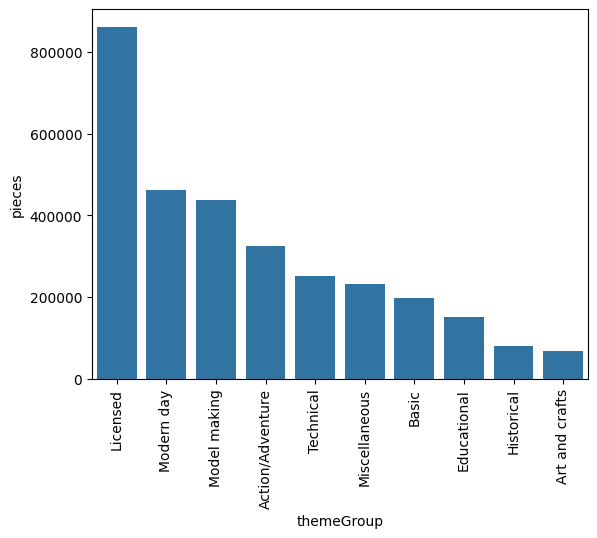

In [16]:
#Create a barplot between themegroup and pieces
sns.barplot(x ='themeGroup', y = 'pieces',data = themes.reset_index())
plt.xticks(rotation = 'vertical')

In [20]:
#Average pieces by sub themes
lego_df.groupby('subtheme').agg({'pieces':'mean'}).sort_values('pieces', ascending = False).head(10)

,pieces
subtheme,
Landmarks,5403.444444
Stadiums,5094.333333
Fairground Collection,3036.285714
Master Builder Series,2999.500000
Ultimate Collector Series,2463.918919
Modular Buildings Collection,2454.000000
Castle System,2386.000000
Dead Men Tell No Tales,2294.000000
Disney Parks,2063.000000


Pieces by age group

(array([ 375.,  325., 3178., 1956.,  584.,  114.,   43.,  212.]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 18.]),
 <BarContainer object of 8 artists>)

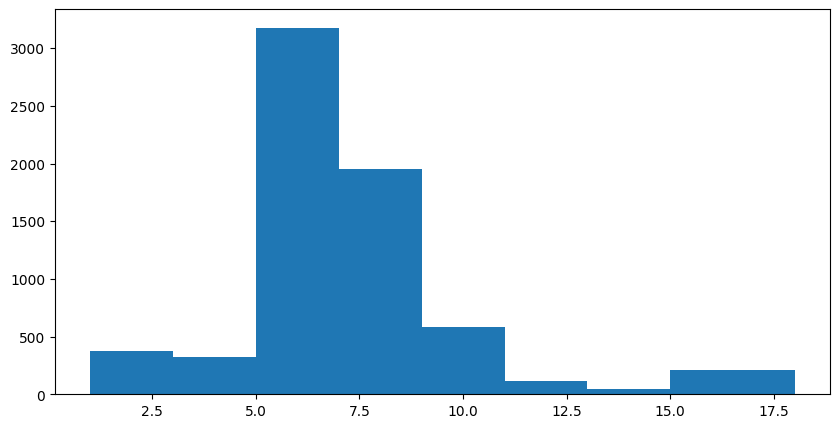

In [21]:
#creating a histogram to see which age range has the highest number of pieces

plt.figure( figsize = (10,5))
plt.hist(lego_df.agerange_min, bins = [1,3,5,7,9,11,13,15,18])


Explore the average number of pieces and minifigs per year

In [22]:
# Exploring the average number of pieces and minifigs per year
%matplotlib inline
# Read sets data as lego_df
print(lego_df.head())

  set_id                     name  year      theme     subtheme themeGroup  \
0    1-8          Small house set  1970  Minitalia            0    Vintage   
1    2-8         Medium house set  1970  Minitalia            0    Vintage   
2    3-6         Medium house set  1970  Minitalia            0    Vintage   
3    4-4          Large house set  1970  Minitalia            0    Vintage   
4    4-6  Mini House and Vehicles  1970  Samsonite  Model Maker    Vintage   

  category  pieces  minifigs  agerange_min  US_retailPrice  \
0   Normal    67.0       0.0           0.0             0.0   
1   Normal   109.0       0.0           0.0             0.0   
2   Normal   158.0       0.0           0.0             0.0   
3   Normal   233.0       0.0           0.0             0.0   
4   Normal     0.0       0.0           0.0             0.0   

                     bricksetURL  \
0  https://brickset.com/sets/1-8   
1  https://brickset.com/sets/2-8   
2  https://brickset.com/sets/3-6   
3  https://bri

,year,pieces
0,1970,41
1,1971,78
2,1972,45
3,1973,76
4,1974,40


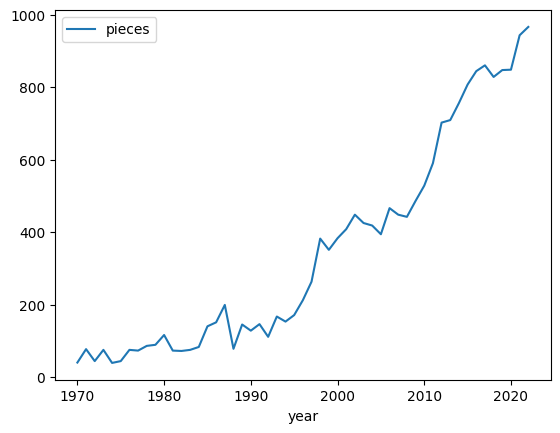

In [23]:
#create a summary of average number of pieces per year: 'pieces per year'
pieces_per_year = lego_df[['year','pieces']].groupby('year',as_index=False).count()

#Plot trends in average number of pieces per year
pieces_per_year.plot(x ='year', y ='pieces')
pieces_per_year.head()

Text(0.5, 1.0, 'Price by theme')

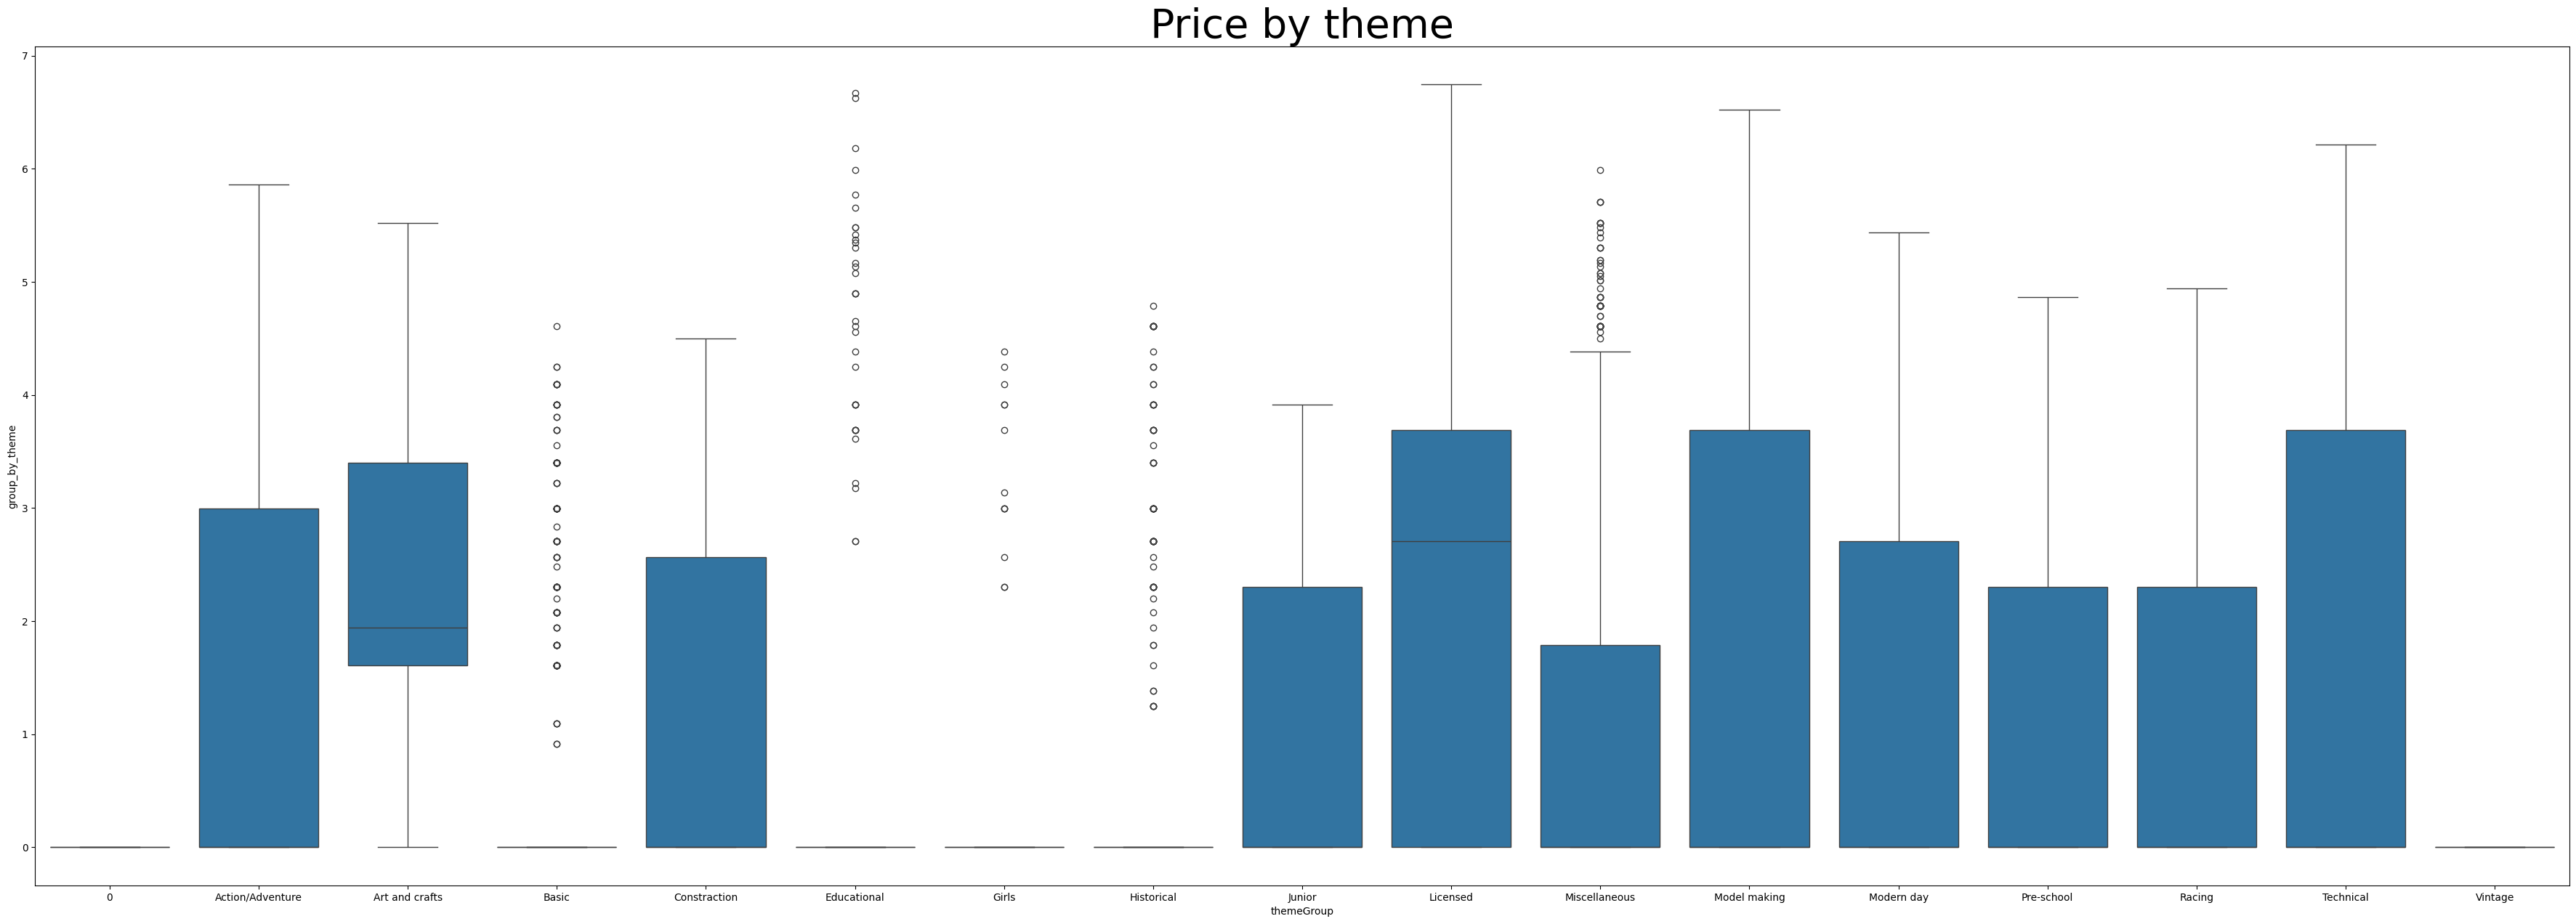

In [24]:
# Price by theme
#The box plot below shows the price of legos grouped by themes. The price is normalized with log base 10 for better visualization.

lego_df['group_by_theme'] =lego_df['US_retailPrice'].apply(lambda x: np.log(x) if x != 0 else 0)
lego_df.sort_values(by = ['US_retailPrice','themeGroup'], inplace = True)
plt.figure(figsize = (45,15))
ax = sns.boxplot(data = lego_df, x = 'themeGroup', y = 'group_by_theme')
ax.set_title('Price by theme', fontdict = {'fontsize': 40})



In [44]:
# Relation between pieces and prices across age ranges=
px.scatter(lego_df, x = 'pieces', y = 'US_retailPrice', range_x =[500,5000],range_y = [50, 500], color = 'agerange_min',range_color = [2,12], title = 'Pieces vs Pricing across age group 2years and 12years')




In [42]:
  px.scatter_3d(lego_df, x = 'pieces', y = 'US_retailPrice',z = 'theme' ,color = 'theme')